In [1]:
import numpy as np

In [2]:
class Economy:
    def __init__(self, population_size=int(1e4), initial_money=100, log_epoch=1000):
        self.ppl = population_size
        self.money = np.ones([population_size]) * initial_money
        
        self.log_epoch = log_epoch
        self.money_log = []
        
    def day(self):
        winners = np.random.randint(0, self.ppl, size=self.ppl)
        loosers = np.random.randint(0, self.ppl, size=self.ppl)
        
        broke_mask = (self.money[loosers] != 0)
        
        self.money[winners] = self.money[winners] + np.ones(self.ppl) * broke_mask
        self.money[loosers] = self.money[loosers] - np.ones(self.ppl) * broke_mask
    
    def __call__(self, n_epoch=1):
        for epoch in range(n_epoch):
            self.day()
        
        return self.money.copy()

### TODO:
  * Describe axes
  * Plot dat function
  * Calculate Gini

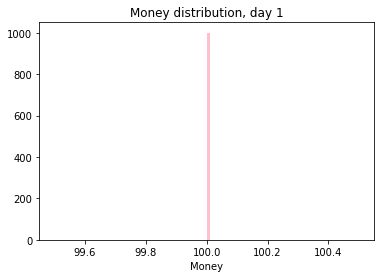

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML, clear_output


economy = Economy(10000)

print("Running the economy")
number_of_frames = 100
days_per_iter = 500
data = [economy.money.copy()] + [economy(days_per_iter) for _ in range(number_of_frames)]
#curve = [1/economy.money*(np.exp(m/economy.money)) for m in range(0, 650)]

def update_hist(num, data): 
    plt.cla()
    plt.hist(data[num], color="pink", bins=100)
    ax.set_title("Money distribution, day %d" % (num * days_per_iter + 1))
    ax.set_xlabel("Money")
    

fig = plt.figure()
ax = fig.add_subplot(111)

print("Creating the animation")
animation = animation.FuncAnimation(fig, update_hist, number_of_frames, fargs=(data, ) )

print("Displaying animation")
plt.cla()
clear_output()
HTML(animation.to_html5_video())

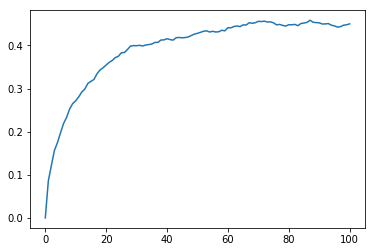

In [34]:
plt.plot(list(map(lambda x: np.abs(np.subtract.outer(x, x)).mean()/np.mean(x)*0.5, data)))